In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


plt.rcParams["figure.figsize"] = (12,7)

## data uploading

In [2]:
netflix = pd.read_csv("C:/Users/mateu/Desktop/Studia/Semestr 5/Szeregi czasowe/Raport netflix/netflix_prices.csv") 
#C:/Users/mateu/Desktop/Studia/Semestr 5/Szeregi czasowe/Raport netflix/netflix_prices.csv
#C:/Users/wypyc/Desktop/semestr 5/szeregi/raport2/data/netflix_prices.csv

netflix = netflix[["Date","Open"]]
netflix = netflix.set_index("Date")

initial_size = len(netflix)

początek 2014 koniec 2021

Text(0.5, 1.0, 'Wykres zależności ceny otwarcia od czasu')

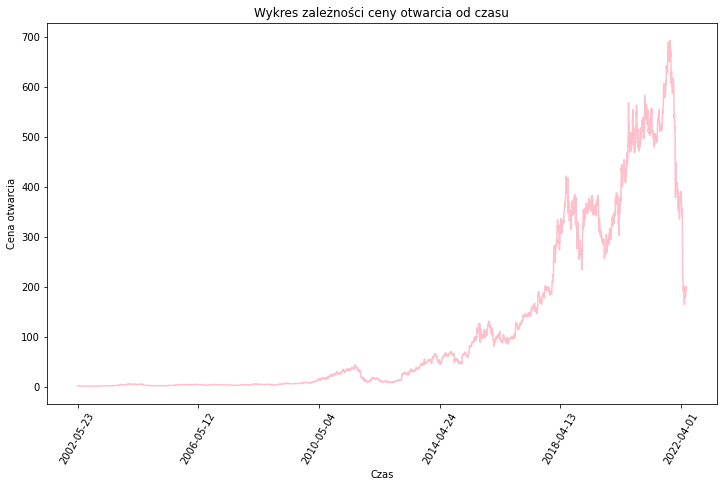

In [3]:
netflix.plot(color = "pink", legend = False)
plt.xlabel("Czas")
plt.ylabel("Cena otwarcia")
plt.xticks(rotation=60)
plt.title("Wykres zależności ceny otwarcia od czasu")

## cut the data

Text(0.5, 1.0, 'Wykres zależności ceny otwarcia od czasu')

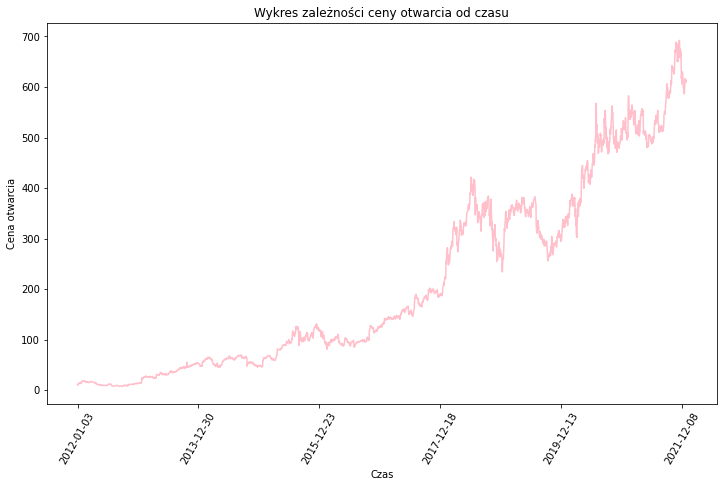

In [4]:
netflix_cut = netflix[netflix.index >= "2012-01-01"]
netflix_cut = netflix_cut[netflix_cut.index <= "2021-12-31"]
initial_cut_size = len(netflix_cut)

netflix_cut.plot(color = "pink", legend = False)
plt.xlabel("Czas")
plt.ylabel("Cena otwarcia")
plt.xticks(rotation=60)
plt.title("Wykres zależności ceny otwarcia od czasu")

## working on missing dates

In [5]:
#change string into datetime type
netflix.index = pd.to_datetime(netflix.index)

#all dates between two ones
all_dates = pd.date_range(netflix.index[0],netflix.index[-1])

#all except these in netflix dataframe
no_netflix_dates = all_dates.difference(netflix.index)

# add missing dates to existing netflix datafra
netflix = netflix.reindex(all_dates, fill_value = 0) #any missing values in the series are filled with 0

In [6]:
len(no_netflix_dates)

2273

In [7]:
len(netflix)

7317

In [8]:
latter_size = len(netflix)
latter_size

print(initial_size,latter_size, latter_size - initial_size)

5044 7317 2273


In [9]:
netflix.Open.value_counts()[0] == latter_size - initial_size ## 0 is only for previous missing values

True

In [10]:
MA_netflix = netflix
MA_netflix["Open"] = MA_netflix["Open"].rolling(30).mean()
MA_netflix
len(MA_netflix)

7317

<AxesSubplot:>

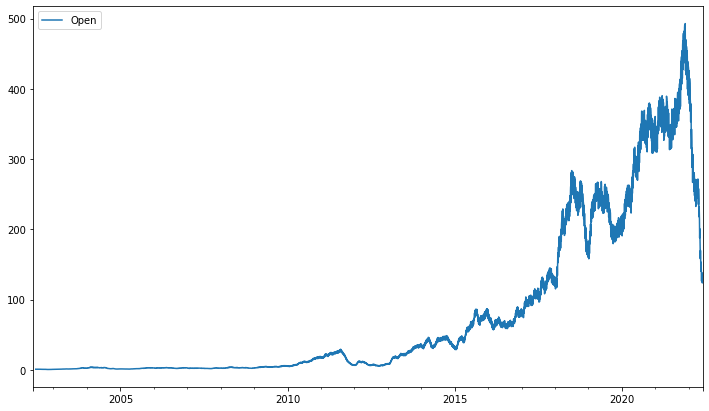

In [11]:
MA_netflix.plot()

In [12]:
MA_cut_netflix = MA_netflix[MA_netflix.index >= "2012-01-01"]
MA_cut_netflix = MA_cut_netflix[MA_cut_netflix.index <= "2021-12-31"]
latter_cut_size = len(MA_cut_netflix)
latter_cut_size

3653

In [13]:
no_MA_cut = netflix[netflix.index >= "2012-01-01"]
no_MA_cut = no_MA_cut[no_MA_cut.index <= "2021-12-31"]
len(no_MA_cut)

3653

In [14]:
print(initial_cut_size, latter_cut_size, latter_cut_size - initial_cut_size)

2517 3653 1136


In [15]:
for i in range(len(no_MA_cut)):
    if no_MA_cut.Open[i] == 0:
        no_MA_cut.Open[i] = MA_cut_netflix.Open[i] 

In [16]:
no_MA_cut.head()

,Open
2012-01-01,6.375476
2012-01-02,6.375476
2012-01-03,6.710143
2012-01-04,6.735857
2012-01-05,6.780333


<AxesSubplot:>

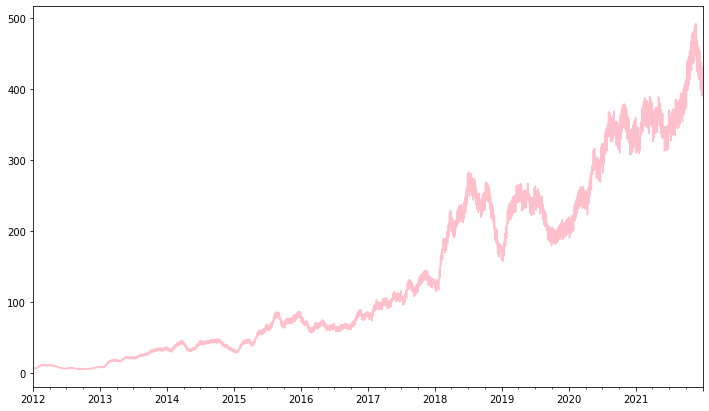

In [17]:
no_MA_cut.plot(color = "pink", legend = False)

## training and testing dataset

In [18]:
training = no_MA_cut[:-300]
test = no_MA_cut[-300:]

Text(0.5, 1.0, 'Wykres zależności ceny otwarcia od czasu dla zbioru treningowego')

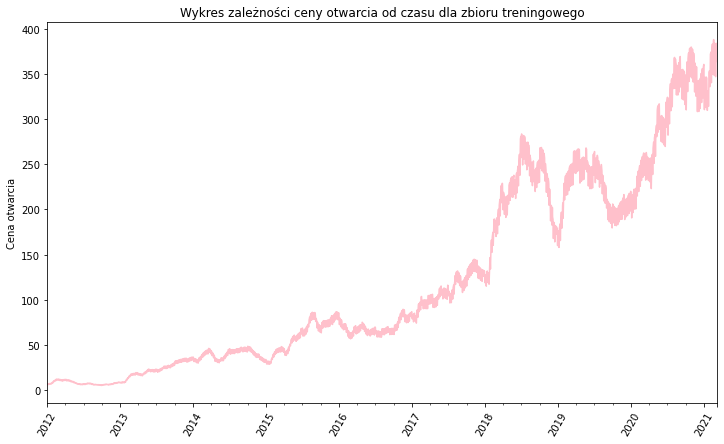

In [19]:
training.plot(color = "pink", legend = False)
plt.ylabel("Cena otwarcia")
plt.xticks(rotation=60)
plt.title("Wykres zależności ceny otwarcia od czasu dla zbioru treningowego")

# Dekompozycja

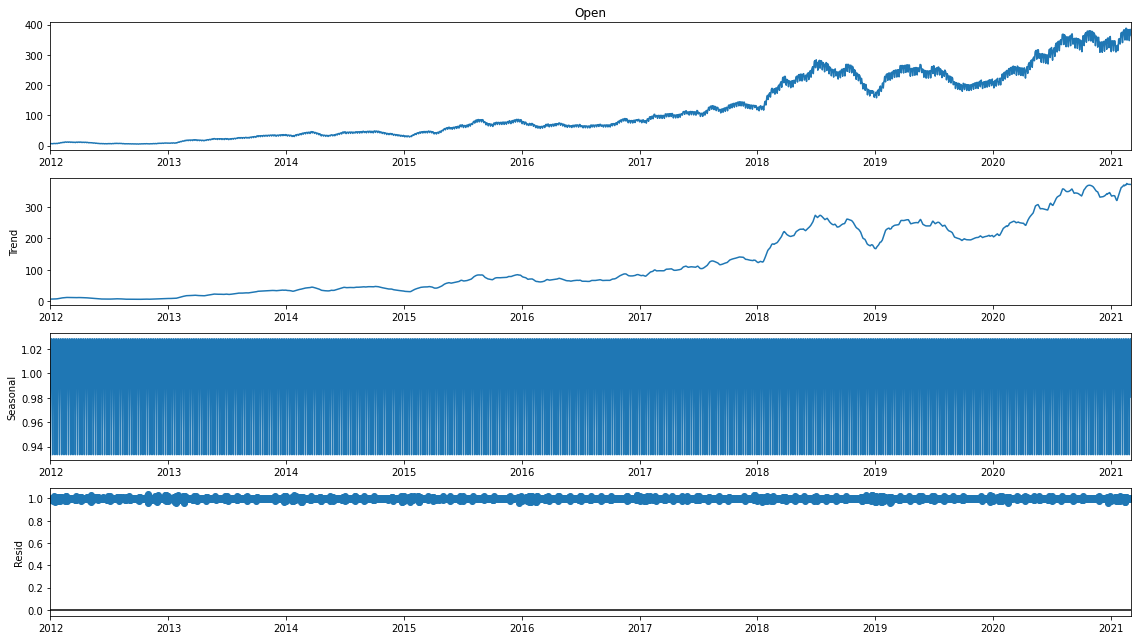

In [74]:
plt.rcParams["figure.figsize"] = (16,9)
decompose_result = seasonal_decompose(training["Open"], model="multiplicative")
decompose_result.plot();
plt.rcParams["figure.figsize"] = (12,7)

plt.savefig("decomposition.pdf", bbox_inches='tight')

In [51]:
seasonal = decompose_result.seasonal
seasonal

2012-01-01    0.933279
2012-01-02    0.976732
2012-01-03    1.024241
2012-01-04    1.028475
2012-01-05    1.028442
                ...   
2021-03-02    1.024241
2021-03-03    1.028475
2021-03-04    1.028442
2021-03-05    1.028237
2021-03-06    0.980594
Freq: D, Name: seasonal, Length: 3353, dtype: float64

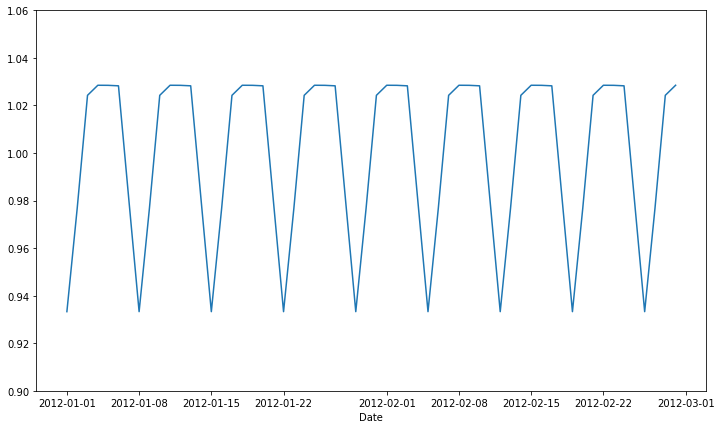

In [72]:
plt.plot(seasonal.index[0:60], seasonal[0:60])
plt.ylim([0.9,1.06])
plt.xlabel("Date")

plt.savefig("seasonal_month.pdf", bbox_inches='tight')

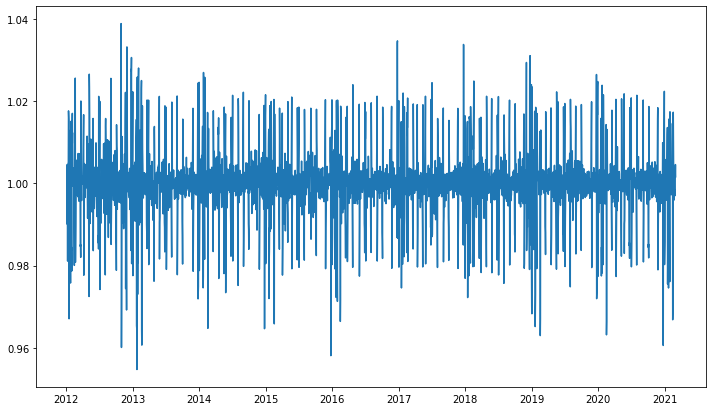

In [73]:
training_decomposed = training["Open"] / decompose_result.trend / decompose_result.seasonal
plt.plot(training_decomposed)

plt.savefig("time_series_stationary.pdf", bbox_inches='tight')

In [54]:
adfuller(training_decomposed.dropna())

(-14.560116466239368,
 4.8097314196963576e-27,
 29,
 3317,
 {'1%': -3.432322977936832,
  '5%': -2.8624117455814906,
  '10%': -2.5672340478895275},
 -23645.137519876618)

## z logarytmem

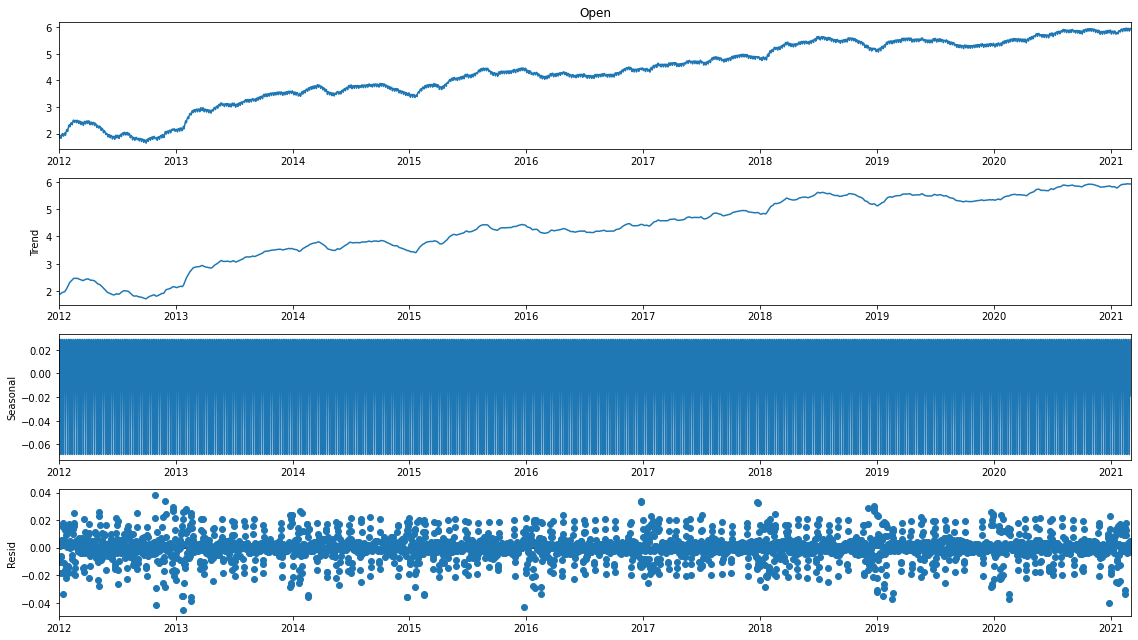

In [56]:
plt.rcParams["figure.figsize"] = (16,9)
logged_training = training["Open"].apply(lambda x : np.log(x))
decompose_log_result = seasonal_decompose(logged_training)
decompose_log_result.plot();
plt.rcParams["figure.figsize"] = (12,7)

<AxesSubplot:title={'center':'Log-Transformed & Differenced Time-Series'}>

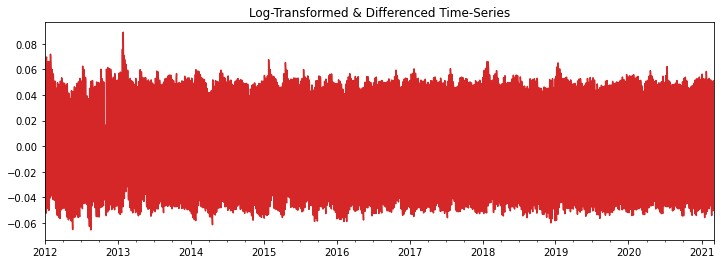

In [57]:
logged_training_diff = logged_training - logged_training.shift()
logged_training_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series")

In [58]:
logged_training_diff

2012-01-01         NaN
2012-01-02    0.000000
2012-01-03    0.051161
2012-01-04    0.003825
2012-01-05    0.006581
                ...   
2021-03-02    0.049283
2021-03-03    0.000794
2021-03-04   -0.001783
2021-03-05   -0.003328
2021-03-06   -0.048262
Freq: D, Name: Open, Length: 3353, dtype: float64

In [59]:
adfuller(logged_training_diff[1:])

(-12.33301875001776,
 6.363838989926422e-23,
 29,
 3322,
 {'1%': -3.432320006074041,
  '5%': -2.8624104329204227,
  '10%': -2.567233349059288},
 -20206.42959397188)

# Test Dickeya-Fullera

In [60]:
adfuller(training)

(-0.07362024466120841,
 0.952003490223564,
 29,
 3323,
 {'1%': -3.4323194127755112,
  '5%': -2.862410170862447,
  '10%': -2.5672332095457397},
 13935.897277055614)